<div style="
        background-color: #2c3e50;
        font-family: 'Arial', sans-serif;
        color: #ecf0f1;
        font-size: 2em;
        text-align: center;
        border-radius: 25px;
        padding: 20px;
        margin: 20px auto;
        width: 80%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Capstone Project | 🚨 Crime Hotspot Detection 🚨
    </div>

<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-size: 20px;
        text-align: left;
        font-weight:bold;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Import Libraries
    </div>

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import joblib 

<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-weight:bold;
        font-size: 20px;
        text-align: left;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Loading the Dataset
    </div>

In [2]:
df = pd.read_csv('data_set.csv')

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-weight:bold;
        font-size: 20px;
        text-align: left;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Data Preprocessing
    </div>

In [4]:
df = df[['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'LAT', 'LON', 'Crm Cd Desc']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901357 entries, 0 to 901356
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date Rptd    901357 non-null  object 
 1   DATE OCC     901357 non-null  object 
 2   TIME OCC     901357 non-null  int64  
 3   AREA NAME    901357 non-null  object 
 4   Rpt Dist No  901357 non-null  int64  
 5   Crm Cd       901357 non-null  int64  
 6   LAT          901357 non-null  float64
 7   LON          901357 non-null  float64
 8   Crm Cd Desc  901357 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 61.9+ MB


In [6]:
df.isnull().sum()

Date Rptd      0
DATE OCC       0
TIME OCC       0
AREA NAME      0
Rpt Dist No    0
Crm Cd         0
LAT            0
LON            0
Crm Cd Desc    0
dtype: int64

In [7]:
df.describe()

,TIME OCC,Rpt Dist No,Crm Cd,LAT,LON
count,901357.000000,901357.000000,901357.000000,901357.000000,901357.000000
mean,1336.869943,1116.280358,500.841333,33.988170,-118.056984
std,653.074344,610.216590,207.636640,1.708768,5.923780
min,1.000000,101.000000,110.000000,0.000000,-118.667600
25%,900.000000,589.000000,331.000000,34.014500,-118.429600
50%,1415.000000,1141.000000,442.000000,34.058600,-118.321500
75%,1900.000000,1614.000000,626.000000,34.163400,-118.273900
max,2359.000000,2199.000000,956.000000,34.334300,0.000000


In [8]:
# Convert date columns to datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

C:\Users\Uttam Dayani\AppData\Local\Temp\ipykernel_22468\1910313247.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
C:\Users\Uttam Dayani\AppData\Local\Temp\ipykernel_22468\1910313247.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


In [9]:
# Extract additional features from date columns
df['Rpt_Year'] = df['Date Rptd'].dt.year
df['Occ_Year'] = df['DATE OCC'].dt.year
df['Occ_Month'] = df['DATE OCC'].dt.month
df['Occ_Day'] = df['DATE OCC'].dt.day

In [10]:
# Drop original date columns
df = df.drop(columns=['Date Rptd', 'DATE OCC'])

<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-weight:bold;
        font-size: 20px;
        text-align: left;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Exploratory Data Analysis (EDA)
    </div>

In [11]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['AREA NAME', 'Crm Cd'], drop_first=True)

In [12]:
# Drop rows with missing values
df = df.dropna()

In [13]:
df.head()

,TIME OCC,Rpt Dist No,LAT,LON,Crm Cd Desc,Rpt_Year,Occ_Year,Occ_Month,Occ_Day,AREA NAME_Central,...,Crm Cd_942,Crm Cd_943,Crm Cd_944,Crm Cd_946,Crm Cd_948,Crm Cd_949,Crm Cd_950,Crm Cd_951,Crm Cd_954,Crm Cd_956
0,2130,784,34.0375,-118.3506,VEHICLE - STOLEN,2020,2020,3,1,False,...,False,False,False,False,False,False,False,False,False,False
1,1800,182,34.0444,-118.2628,BURGLARY FROM VEHICLE,2020,2020,2,8,True,...,False,False,False,False,False,False,False,False,False,False
2,1700,356,34.0210,-118.3002,BIKE - STOLEN,2020,2020,11,4,False,...,False,False,False,False,False,False,False,False,False,False
3,2037,964,34.1576,-118.4387,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2023,2020,3,10,False,...,False,False,False,False,False,False,False,False,False,False
4,1200,666,34.0944,-118.3277,THEFT OF IDENTITY,2022,2020,8,17,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
print(df.columns)

Index(['TIME OCC', 'Rpt Dist No', 'LAT', 'LON', 'Crm Cd Desc', 'Rpt_Year',
       'Occ_Year', 'Occ_Month', 'Occ_Day', 'AREA NAME_Central',
       ...
       'Crm Cd_942', 'Crm Cd_943', 'Crm Cd_944', 'Crm Cd_946', 'Crm Cd_948',
       'Crm Cd_949', 'Crm Cd_950', 'Crm Cd_951', 'Crm Cd_954', 'Crm Cd_956'],
      dtype='object', length=167)


<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-weight:bold;
        font-size: 20px;
        text-align: left;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Plotting
    </div>

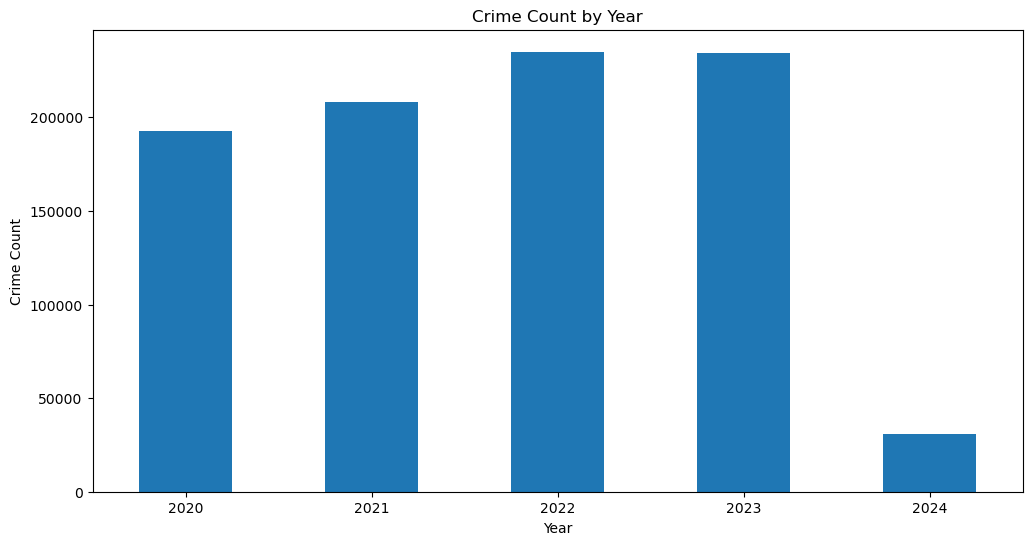

In [15]:
import matplotlib.pyplot as plt

# Plot crime count by year
plt.figure(figsize=(12, 6))
df['Rpt_Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Crime Count by Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.xticks(rotation=0)
plt.show()

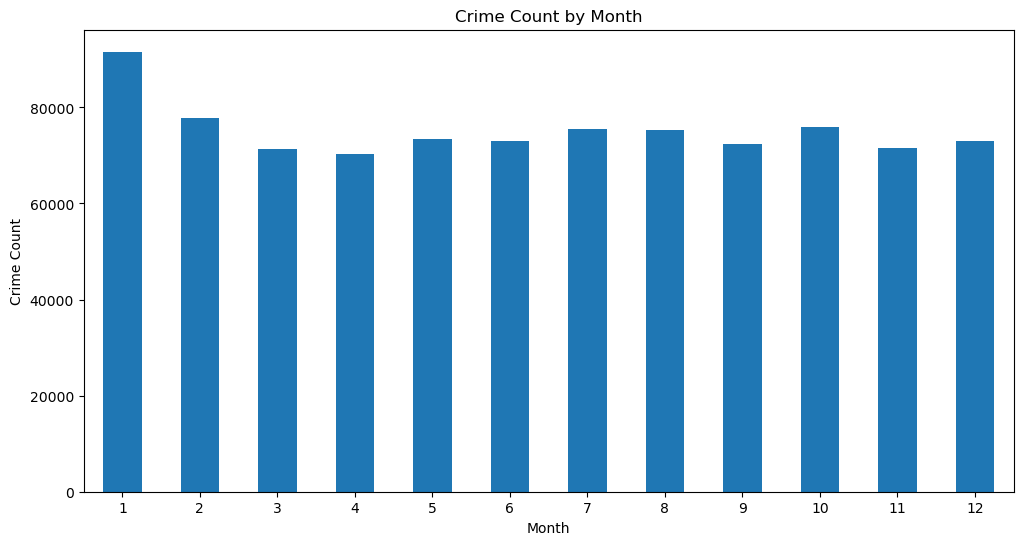

In [16]:
# Plot crime count by month
plt.figure(figsize=(12, 6))
df['Occ_Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Crime Count by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=0)
plt.show()


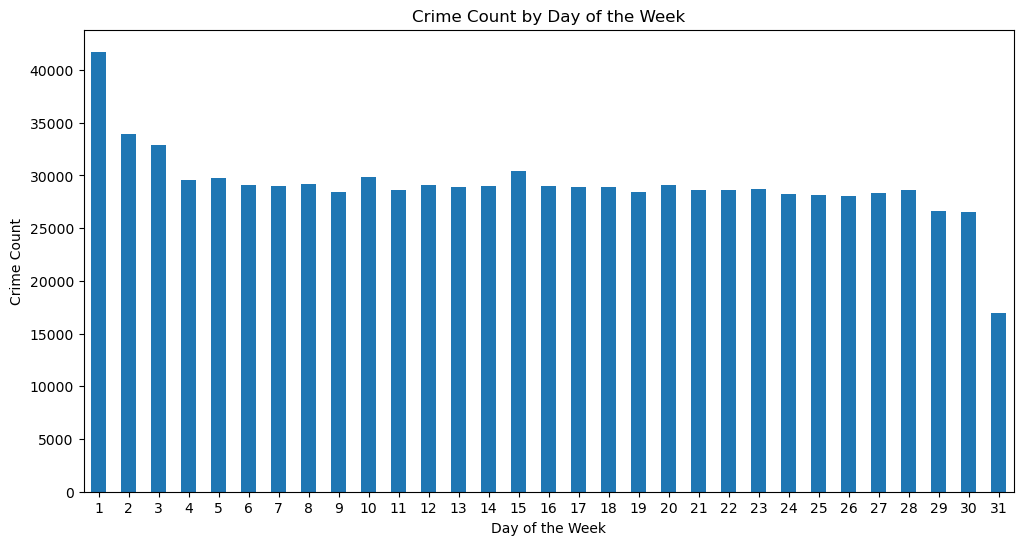

In [17]:
# Plot crime count by day of the week
plt.figure(figsize=(12, 6))
df['Occ_Day'].value_counts().sort_index().plot(kind='bar')
plt.title('Crime Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Crime Count')
plt.xticks(rotation=0)
plt.show()


<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-weight:bold;
        font-size: 20px;
        text-align: left;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Encoding the Target Variable
    </div>

In [18]:
# Encode the target variable (crime descriptions)
label_encoder = LabelEncoder()
df['Crm Cd Desc'] = label_encoder.fit_transform(df['Crm Cd Desc'])

In [19]:
# Splitting Features and Target Variable:
# X (Features), y (Target Variable)

X = df.drop(columns=['Crm Cd Desc'])
y = df['Crm Cd Desc']

<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-weight:bold;
        font-size: 20px;
        text-align: left;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Train-Test Split and Scaling
    </div>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-weight:bold;
        font-size: 20px;
        text-align: left;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Model Training and Evaluation
    </div>

In [23]:
# model selection Linear Regression, Decision Tree Regression amd Random Forest Regression.
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42)
}

In [26]:
# Initialize the model
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on test data
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)  # R^2 score
    mae = mean_absolute_error(y_test, y_pred)  # mean
    tolerance = 0.10
    accuracy_within_tolerance = np.mean(np.abs((y_pred - y_test) / y_test) < tolerance)
    # Print results
    print(f"{name} Results:")
    print(f"R^2 Score: {r2}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Accuracy within : {accuracy_within_tolerance * 100:.2f}%\n")


Linear Regression Results:
R^2 Score: 1.0
Mean Absolute Error: 6.149855138711906e-13
Accuracy within : 99.73%

Decision Tree Regressor Results:
R^2 Score: 1.0
Mean Absolute Error: 0.0
Accuracy within : 99.73%

Random Forest Regressor Results:
R^2 Score: 0.9999999654181795
Mean Absolute Error: 4.548681991657057e-05
Accuracy within : 99.73%



<div style="
        background-color: #cf77e6;
        font-family: 'Arial', sans-serif;
        color: #000;
        font-weight:bold;
        font-size: 20px;
        text-align: left;
        border-radius: 10px;
        padding: 20px;
        width:90%;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    ">
        Saving the Model and Other Components
    </div>

In [27]:
# Save the trained model, scaler, label encoder, and training columns
joblib.dump(model, 'crime_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(X.columns, 'columns.pkl')

['columns.pkl']